In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install finance-datareader

In [3]:
import FinanceDataReader as fdr
A = fdr.DataReader('003070', '2018-01-01', '2019-11-30')

#Prophet

In [4]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
A['y'] = A['Close']
A['ds'] = A.index

In [5]:
#prophet 객체 선언 및 학습
m = Prophet(changepoint_prior_scale=0.8, #보통 changepoint_prior_scale= 0.05로 되어있음 
            yearly_seasonality=True,
            daily_seasonality=True
            )
m.fit(A)
future = m.make_future_dataframe(periods=30) #30일 예측
forecast = m.predict(future)#predict로 예측을 진행합니다. predict 안에는 이전 단계에서 만들어준 future 데이터프레임을 입력합니다.
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-30:-1] #예측 30일을 출력 합니다

,ds,yhat,yhat_lower,yhat_upper
470,2019-11-30,9479.015707,9117.118062,9858.426486
471,2019-12-01,9439.021924,9086.686022,9786.533574
472,2019-12-02,9500.480001,9128.554357,9888.209829
473,2019-12-03,9409.501080,9037.172850,9778.025023
474,2019-12-04,9359.331972,8982.590804,9726.096590
475,2019-12-05,9322.525509,8952.602461,9712.867309
476,2019-12-06,9265.951965,8879.939397,9614.819594
477,2019-12-07,9084.508146,8689.229588,9471.992943
478,2019-12-08,9005.128813,8599.768904,9420.836266
479,2019-12-09,9026.639947,8617.228012,9405.730004


시각화

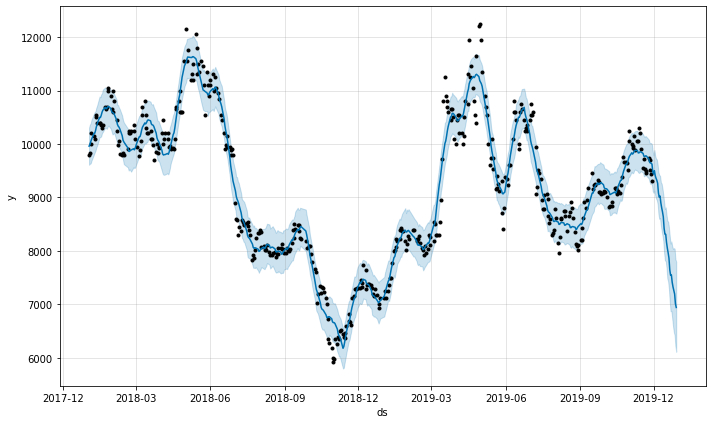

In [6]:
#plot은 트렌드와 함께 예측된 결과물을 시각화하여 보여줍니다.
fig = m.plot(forecast)

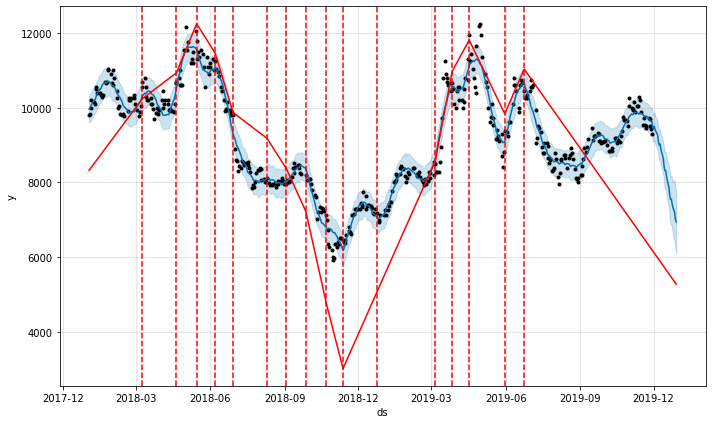

In [7]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [8]:
Close = A['Close']
yhat = forecast[['yhat']].iloc[0:470]
# RMSE
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(Close, yhat) 
np.sqrt(MSE)

291.09420425072636

In [9]:
B = fdr.DataReader('003070', '2019-12-01', '2019-12-31') # test
B

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-12-02,9390,9400,9190,9320,23086,0.001074
2019-12-03,9320,9390,9150,9340,14981,0.002146
2019-12-04,9360,9390,9130,9130,18797,-0.022484
2019-12-05,9060,9220,9060,9090,14406,-0.004381
2019-12-06,9090,9400,9090,9380,22696,0.031903
2019-12-09,9380,9610,9320,9520,16962,0.014925
2019-12-10,9600,9600,9410,9470,6775,-0.005252
2019-12-11,9470,9580,9390,9550,8908,0.008448
2019-12-12,9510,9950,9510,9760,83975,0.021990


In [10]:
B.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2019-12-02 to 2019-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     int64  
 1   High    20 non-null     int64  
 2   Low     20 non-null     int64  
 3   Close   20 non-null     int64  
 4   Volume  20 non-null     int64  
 5   Change  20 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 1.1 KB


In [11]:
B['ds'] = B.index

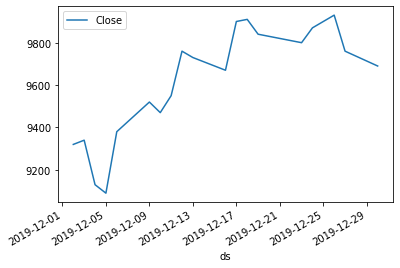

In [12]:
B.plot(x='ds', y='Close')

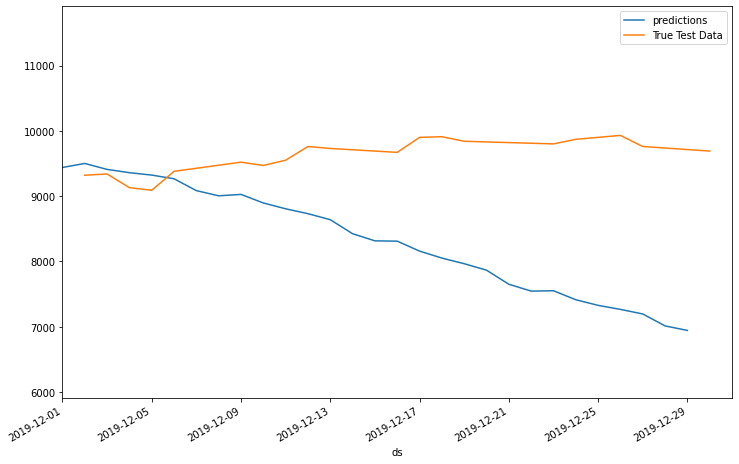

In [13]:
#m.plot(forecast)
ax = forecast[['yhat']].iloc[-1:-30]
ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
B.plot(x='ds', y='Close', legend=True, label='True Test Data',ax=ax,xlim=('2019-12-01', '2019-12-31'))